In [2]:
import os
import zipfile
from pprint import pprint
from code_submission import model
from datetime import datetime

# Create a model instance

In [2]:
m = model.Model()

# Visualize the microwave image
You have access to several convenience methods that simplify getting started with the task. 

We would like to have a first look at the microwave images. Each image consists of three slices. We utilize the convenience method `visualize_microwave_volume()` to visualize the image. Given the path to the microwave image, the microwave and the corresponding labels (if available) are visualized

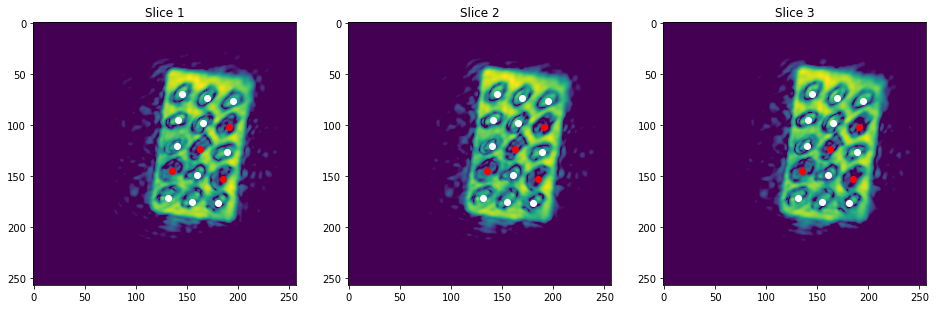

In [3]:
tiff_path = os.path.join('public_data', '0ab7263b6134489d09f14dfca9a24bbd.tiff')
m.visualize_microwave_volume(tiff_path)

# Predictions
Now we test the default implementation for the `predict()` function. The `predict()` function takes the directory of the data set as an input. This way, it is up to you how to process the images the fastest way.

## Perform the predictions

In [4]:
dataset_dir = 'public_data'
predictions = m.predict(dataset_dir)

## Evaluate the predictions

First, we are going to find the prediction of the given microwave image.

In [5]:
prediction = [prediction for prediction in predictions if prediction['file'] == os.path.basename(tiff_path)][0]

Let us have a look at the prediction.

In [6]:
pprint(prediction, sort_dicts=False)

{'file': '0ab7263b6134489d09f14dfca9a24bbd.tiff',
 'missing_pills': 2,
 'present_pills': 4,
 'coordinates': {'missing': [(50.0, 50.0), (100.0, 50.0)],
                 'present': [(50.0, 100.0),
                             (100.0, 100.0),
                             (50.0, 150.0),
                             (100.0, 150.0)]}}


Now, we are going to visualize the prediction. Instead of loading the labels, we provide the prediction dictionary.

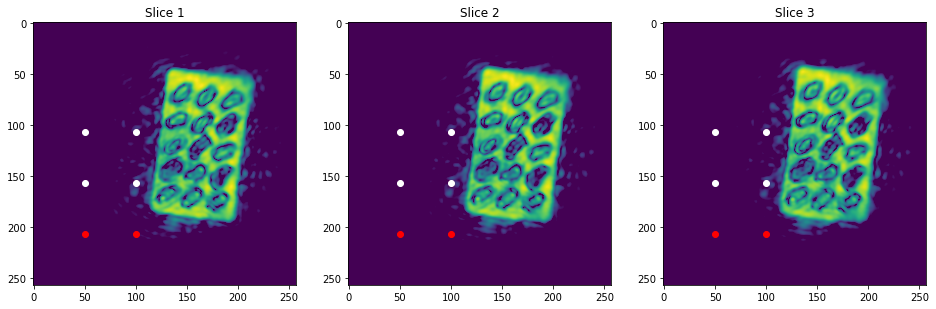

In [7]:
m.visualize_microwave_volume(tiff_path, label=prediction)

You can see that the default implementation is not very accurate. The number of present and missing pills are not correct and the estimated locations do not match the actual locations.

It is your task now to improve the model. Improve the `predict()` function and test the performance on the dataset. Once you are satisfied with the results, you can upload your solution to the CodaLab platform to find out how it performs on unknown data.

# Preparation of the CodaLab submission

If you want to upload your solution to the CodaLab platform, it must be in a specific format. You can find an example in `code_submission_example.zip`.

To make your life easier, you can use the following code to generate the submission file.

In [30]:
submission_dir = 'code_submission'

if os.path.exists(submission_dir):
    submission_filename = f"{datetime.strftime(datetime.now(), '%Y-%m-%d_%H-%M-%S')}_submission.zip"
    submission_file = zipfile.ZipFile(submission_filename, 'w', zipfile.ZIP_DEFLATED)
    for root, dirs, files in os.walk(submission_dir):
        for file in files:
            submission_file.write(os.path.join(root, file), os.path.join(root, file).replace(submission_dir, '.'))
    submission_file.close()
    print(f"Submission file {submission_filename} created")

Submission file 2022-04-26_13-09-02_submission.zip created


# Test your model performance

The following commands are executed on the CodaLab platform.

### Run the ingestion program to generate and export the predictions.

In [35]:
! python ingestion_program/ingestion.py public_data evaluation_results/res public_data ingestion_program ./code_submission

Ingestion program started.
Using input_dir: E:\detect_the_difference\public_data
Using output dir: E:\detect_the_difference\evaluation_results\res
Using program_dir: E:\detect_the_difference\ingestion_program
Using submission_dir: E:\detect_the_difference\code_submission
Available GPU(s): [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Checking Python code quality
************* Module code_submission.detect_single
code_submission\detect_single.py:82:0: C0305: Trailing newlines (trailing-newlines)
code_submission\detect_single.py:1:0: C0114: Missing module docstring (missing-module-docstring)
code_submission\detect_single.py:12:0: C0413: Import "from yolov5.models.common import DetectMultiBackend" should be placed at the top of the module (wrong-import-position)
code_submission\detect_single.py:13:0: C0413: Import "from yolov5.utils.general import check_img_size, non_max_suppression, scale_coords, xyxy2xywh" should be placed at the top of the module (wrong-import-pos

YOLOv5  torch 1.11.0+cu113 CPU

Fusing layers... 


### Estimate the scoring metrics based on the previously exported predictions.

In [36]:
! python scoring_program/score.py evaluation_results scoring_output



Scoring program started
Scoring is based on 15 samples.
Anomaly detection accuracy: 100.000000
Average sample accuracy   :  97.555556
Code quality              :  53.600000
Distance score            :  97.741242
Prediction time           :   0.938096
Total elapsed time        :   0.000000
Total score               :  79.635951
Scoring program completed.
